In [26]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [27]:
data = pd.read_csv('hotel_bookings.csv')

In [28]:
input_information = data[['hotel','lead_time','stays_in_week_nights','stays_in_weekend_nights','adults','reserved_room_type','adr','total_of_special_requests','is_canceled']]

In [29]:
input_information = pd.get_dummies(data=input_information)

In [30]:
input_information.shape

(119390, 19)

In [31]:
Y_train = input_information["is_canceled"]
X_train = input_information.drop(labels = ["is_canceled"],axis = 1)

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(random_state=15)

In [33]:
#danh gia diem so bang cach xac thuc cheo
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10)
print(clf_score)

[0.6243404  0.61521065 0.60582963 0.57483876 0.6054946  0.68724349
 0.55540665 0.64268364 0.6243404  0.50431359]


In [34]:
clf_score.mean()

0.6039701817572661

In [35]:
#Extract Knowledge from model
Rfclf_fea = pd.DataFrame(Rfclf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
0,0.40,lead_time
4,0.34,adr
5,0.09,total_of_special_requests
1,0.07,stays_in_week_nights
2,0.04,stays_in_weekend_nights


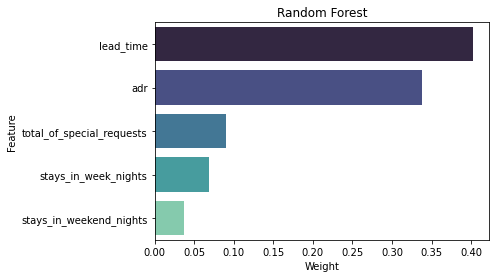

In [36]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="mako",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")